# Logistic Regression

Despite the name, logistic regression is the most simple machine learning model for classification. In the most general case, given a list of features $\mathbf{X} = [x^{(1)}, x^{(2)}, x^{(3)}, ..., x^{K}]$, a logistic regression will assign a probability to each sample $\mathbf{X}_i$. This probability $P(\mathbf{X}_i)$ indicates the likelihood for $\mathbf{X}_i$ to belong to class $A$ while $1 - P(\mathbf{X}_i)$ for the other class $B$. During model training, the target labels $y_i$ are assigned the value 0 (false outcome) or 1 (positive outcome) which represents a certain probability (this obvious because either outcome has occured such that the data was recorded). Since we are dealing with a binary classification problem, $A$ often refers to positive (+) result and $B$ to a negative (-) outcome. Consider the following dataset on breast cancer diagnosis from: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic with implementation details at https://scikit-learn.org/stable/datasets/toy_dataset.html, 

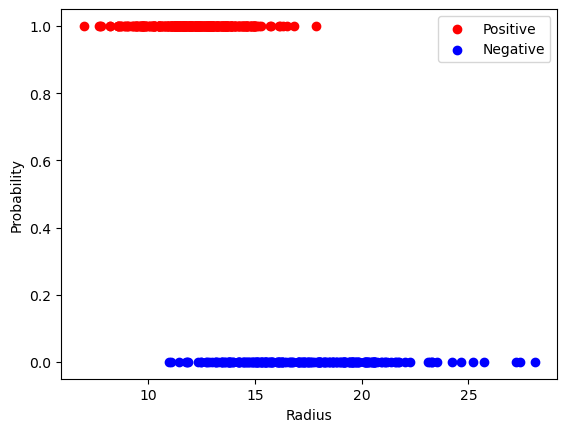

In [37]:
# Imports,
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset,
dataset = load_breast_cancer()
targets = dataset["target"]
radius = dataset["data"].T[0] # <-- Radius as the feature

# Sorting data in ascending order,
false_indices, true_indices = np.where(targets == 0)[0], np.where(targets == 1)[0]
targets_true, radius_true = targets[true_indices], radius[true_indices]
targets_false, radius_false = targets[false_indices], radius[false_indices]

# Plotting,
plt.scatter(radius_true, targets_true, color="red", label="Positive")
plt.scatter(radius_false, targets_false, color="blue", label="Negative")
plt.xlabel("Radius")
plt.ylabel("Probability")
plt.legend(loc="upper right")
plt.show()

When comparing the breast tissue radius to the diagnosis result, we see that lower values are generally associated with a positive result while higher ones correspond to negatives. In these situtations, where there is a clear transition, employing logistic models is worth considering. The logistic model predicts that the probability $\mathbf{X}_i$ is given by a sigmoid curve,

$$P(\mathbf{X}_i) = \frac{1}{1+e^{-z(\mathbf{X}_i)}}$$

In which, $z = \beta_0 + \mathbf{\beta} \mathbf{X}_i^{T}$ where $\mathbf{\beta} = [\beta_1, \beta_2, ..., \beta_K]$. $\mathbf{\beta}$ is a list of model parameters associated with each input feature with the exception of 
$\beta_0$ which is always a parameter. The sigmoid function squashes any real-valued input into the interval $(0,1)$, making it suitable for modeling probabilities. For our case, we have $z = \beta_0 + \beta_1 x_i$ since we only have a single feature (the radius of the breast tissue). The loss function for logistic regression is binary cross-entropy is,

$$\mathcal{L(y_i, \hat{y_i})} = - \frac{1}{N} \sum^{N}_{i=1} y_i \log[P(X_i) + (1-y_i)\log[1-P(X_i)]]$$

In which, the model prediction is $\hat{y_i} = P(X_i)$ and $y_i$ is the target (1 or 0). Binary cross-entropy is derived from theoretical from maximum likehood estimation (MLE). Specifically, it is the negative log-likelihood of a Bernoulli distribution $\mathcal{L} = -\log(l)$ where c is the LE function (details are covered in the associated PDF), so minimising the cross-entropy corresponds to maximising $l$. There are no other standard loss functions for logistic regression. For the purposes of gradient descent, the components of the gradient $\nabla \mathcal{L}$,

$$\frac{\partial \mathcal{L}}{\partial \mathcal{\beta_j}} = \frac{1}{N} \sum^{N}_{i=1} x_i^{(j)} \left[ P(\mathbf{X_i}) - y_i \right]$$

Here, $x_i^{(j)}$ denotes the value of the $j$-th feature of the $i$-th data point. Specific to our case we have,

$$
\begin{aligned}
\textbf{(1)} & \quad P(x_i) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_i)}} \\
\textbf{(2)} & \quad \mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log P(x_i) + (1 - y_i) \log(1 - P(x_i)) \right] \\
\textbf{(3)} & \quad \frac{\partial \mathcal{L}}{\partial \beta_0} = \frac{1}{N} \sum_{i=1}^{N} \left[ P(x_i) - y_i \right], \quad 
                \frac{\partial \mathcal{L}}{\partial \beta_1} = \frac{1}{N} \sum_{i=1}^{N} \left[ P(x_i) - y_i \right] x_i
\end{aligned}
$$

In the code below, we will fit a logistic regression model to the breast cancer diagnosis dataset using gradient descent,

\begin{align*}
\beta_0 &\leftarrow \beta_0 - \eta \cdot \frac{\partial \mathcal{L}}{\partial \beta_0} \\
\beta_1 &\leftarrow \beta_1 - \eta \cdot \frac{\partial \mathcal{L}}{\partial \beta_1}
\end{align*}

In [38]:
def min_max(x):
    """Min-max normalisation."""
    x_min, x_max = np.min(x), np.max(x)
    return (x - x_min)/(x_max - x_min)

def sigmoid(x, beta_0, beta_1):
    return 1/(1 + np.exp(-1*(beta_0 + beta_1*x)))

def cross_entropy_loss(y, y_pred):
    return -1*np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

EPOCHS = 10000
LEARNING_RATE = 1
beta_0, beta_1 = 1, 1

# Normalising data,
radius_normalised = min_max(radius)
N = len(radius)

# Performing gradient descent,
for epoch in range(EPOCHS):

    # Computing prediction,
    y_pred = sigmoid(x=radius_normalised, beta_0=beta_0, beta_1=beta_1)

    # Computing gradient components,
    grad_beta_0 = (1/N)*np.sum(y_pred - targets)
    grad_beta_1 = (1/N)*np.sum((y_pred - targets)*radius_normalised)

    # Updating parameters,
    beta_0 = beta_0 - LEARNING_RATE*grad_beta_0
    beta_1 = beta_1 - LEARNING_RATE*grad_beta_1

    # Computing loss,
    y_pred = sigmoid(x=radius_normalised, beta_0=beta_0, beta_1=beta_1)
    loss = cross_entropy_loss(y=targets, y_pred=y_pred)

    # Printing,
    print(f"Epoch: {epoch}, Loss: {loss}")


Epoch: 0, Loss: 429.7883997783537
Epoch: 1, Loss: 415.4135988030064
Epoch: 2, Loss: 405.8025408024323
Epoch: 3, Loss: 399.29981707945177
Epoch: 4, Loss: 394.72409991659697
Epoch: 5, Loss: 391.30160468503345
Epoch: 6, Loss: 388.55457575412805
Epoch: 7, Loss: 386.1997332007004
Epoch: 8, Loss: 384.0736837670795
Epoch: 9, Loss: 382.0839339657478
Epoch: 10, Loss: 380.17877502318413
Epoch: 11, Loss: 378.3295227717027
Epoch: 12, Loss: 376.5203241752647
Epoch: 13, Loss: 374.74241240131295
Epoch: 14, Loss: 372.99090926393126
Epoch: 15, Loss: 371.26306094473546
Epoch: 16, Loss: 369.55727050124256
Epoch: 17, Loss: 367.8725696261092
Epoch: 18, Loss: 366.20833112754536
Epoch: 19, Loss: 364.5641127796122
Epoch: 20, Loss: 362.93957265401355
Epoch: 21, Loss: 361.33442326729687
Epoch: 22, Loss: 359.7484067770305
Epoch: 23, Loss: 358.1812815835093
Epoch: 24, Loss: 356.6328151095746
Epoch: 25, Loss: 355.1027799271396
Epoch: 26, Loss: 353.590951697254
Epoch: 27, Loss: 352.0971080933966
Epoch: 28, Loss: 35

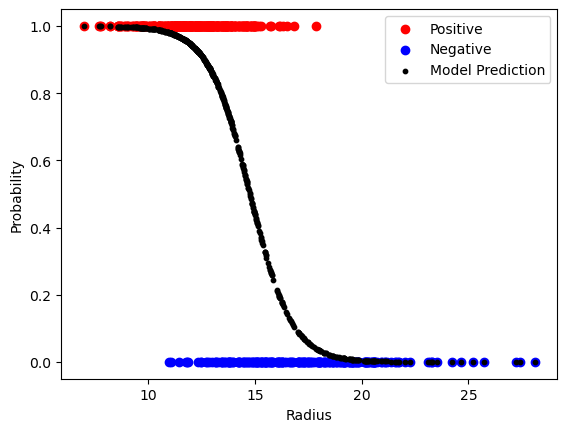

In [45]:
# Plotting,
plt.scatter(radius_true, targets_true, color="red", label="Positive")
plt.scatter(radius_false, targets_false, color="blue", label="Negative")
plt.scatter(radius, y_pred, color="black", s=10, label="Model Prediction")
plt.xlabel("Radius")
plt.ylabel("Probability")
plt.legend(loc="upper right")
plt.show()